In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

from light_curve_simulator import sim_lc

ppm = 25
per_aper_ratio = 2
t = np.linspace(1, 100, 10000)
periodic_freq = 0.01
aperiodic_freq = 0.1
A = 5e-5
planet_params = [t[int(len(t)/2.)], 365, 85, 215, 90, 0, 90, 0.5, 0.5]

flux = sim_lc(t, ppm, per_aper_ratio, periodic_freq, aperiodic_freq, A, planet=True, planet_params=planet_params)

from light_curve_simulator import igf

pixel_gain = np.random.rand(20, 20)*0.1 + 0.9

F, frames = igf(t, pixel_gain, 20, 4, flux)

/Users/tgordon/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


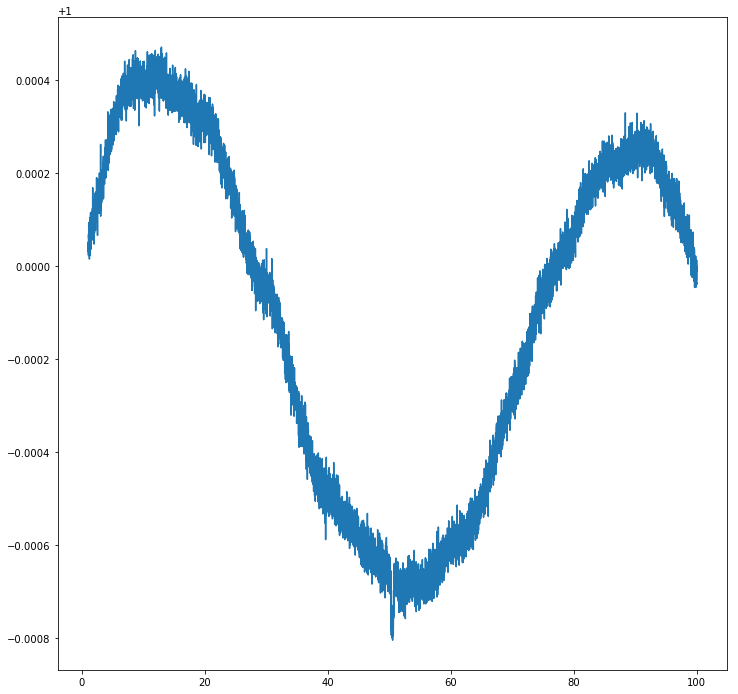

In [2]:
pl.plot(t, F+1, '-')
#pl.plot(t, flux)
pl.gcf().set_size_inches(12, 12)

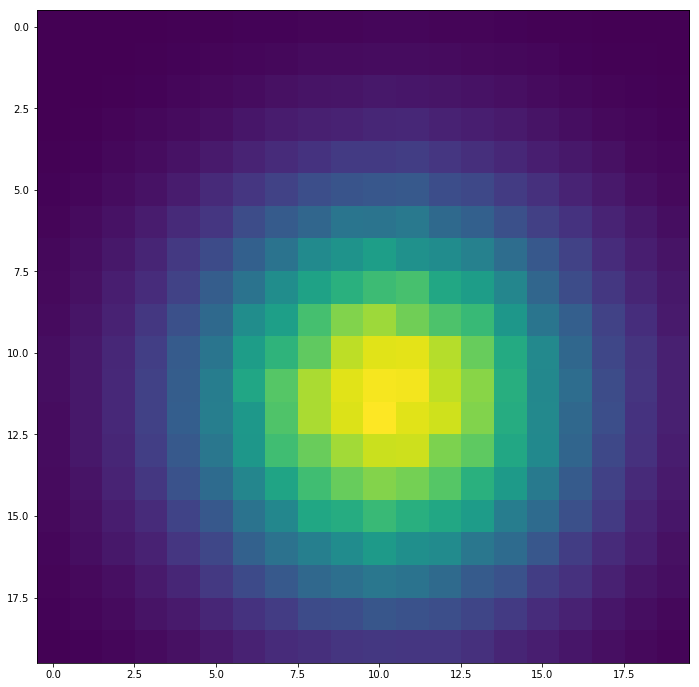

In [3]:
import matplotlib.animation as animation
from IPython.display import HTML

fig = pl.figure()
im = pl.imshow(frames[0], animated=True)
fig.set_size_inches(12, 12)
i = 0

def update_fig(f, *args):
    global i
    im.set_array(f)
    i += 1
    return im,

ani = animation.FuncAnimation(fig, update_fig, frames=frames[::100], interval=100, blit=True)
HTML(ani.to_html5_video())